In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [6]:
def set_apa_style():
    plt.style.use('fivethirtyeight')
    plt.rcParams['font.size'] = 12
    plt.rcParams['axes.labelsize'] = 14
    plt.rcParams['axes.titlesize'] = 16
    plt.rcParams['xtick.labelsize'] = 12
    plt.rcParams['ytick.labelsize'] = 12
    plt.rcParams['legend.fontsize'] = 12
    plt.rcParams['figure.titlesize'] = 18
    plt.rcParams['lines.linewidth'] = 2
def design_fir_filter(numtaps, cutoff, fs):
    return signal.firwin(numtaps, cutoff, window='hamming', pass_zero='lowpass', fs=fs)

def plot_filter_characteristics(b, fs):
    set_apa_style()
    w, h = signal.freqz(b, worN=8000)
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))
    
    # Frequency response
    ax1.plot(0.5*fs*w/np.pi, np.abs(h), color='black')
    ax1.set_title('Frequency Response')
    ax1.set_xlabel('Frequency (Hz)')
    ax1.set_ylabel('Gain')
    ax1.grid(True, linestyle='--', alpha=0.7)
    
    # Impulse response
    ax2.stem(range(len(b)), b, linefmt='black', markerfmt='ko', basefmt='k-')
    ax2.set_title('Impulse Response')
    ax2.set_xlabel('Samples')
    ax2.set_ylabel('Amplitude')
    ax2.grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()

def plot_results(time, original_data, filtered_data):
    set_apa_style()
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(time, original_data, label='Original', color='black', linestyle='-')
    ax.plot(time, filtered_data, label='Filtered', color='gray', linestyle='--')
    ax.set_title('Original vs Filtered Time Series')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Amplitude')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

def generate_step_function(length, step_point):
    return np.concatenate([np.zeros(step_point), np.ones(length - step_point)])

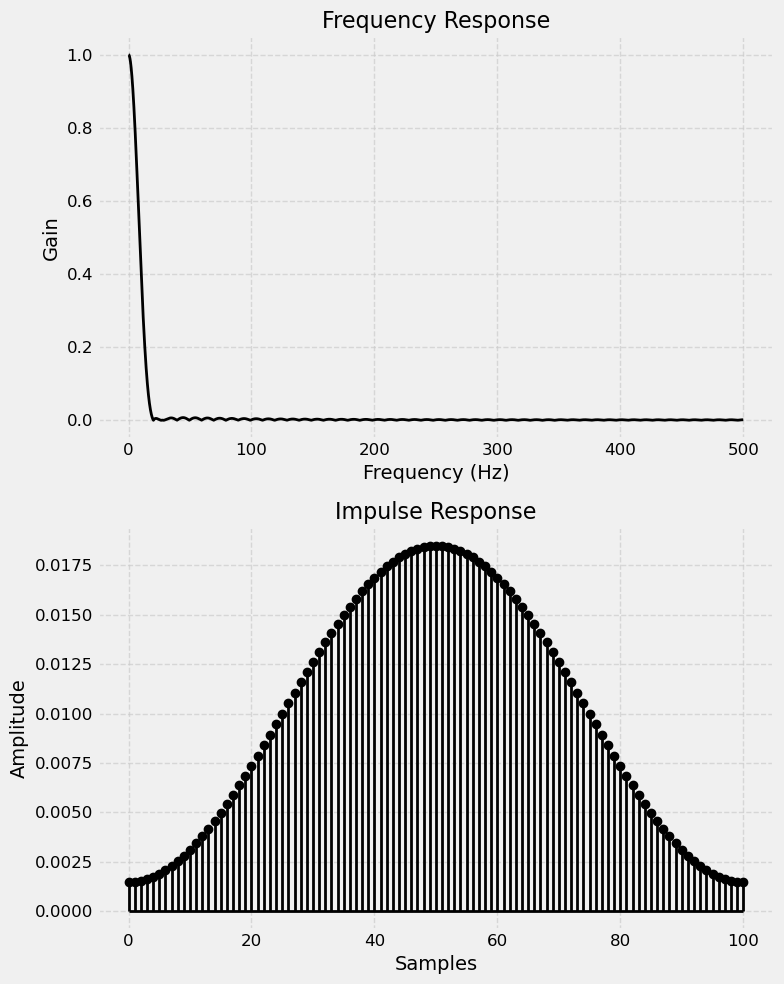

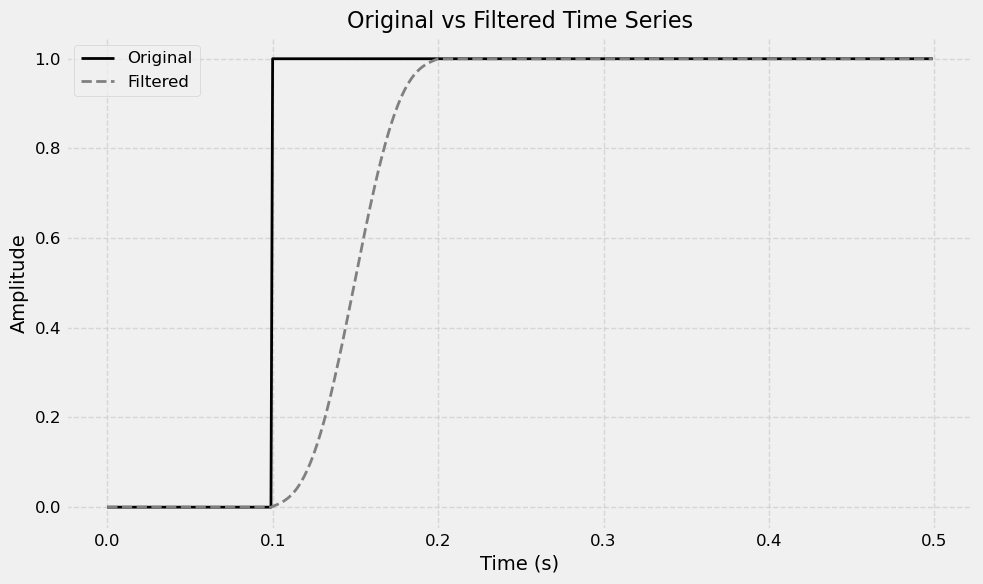

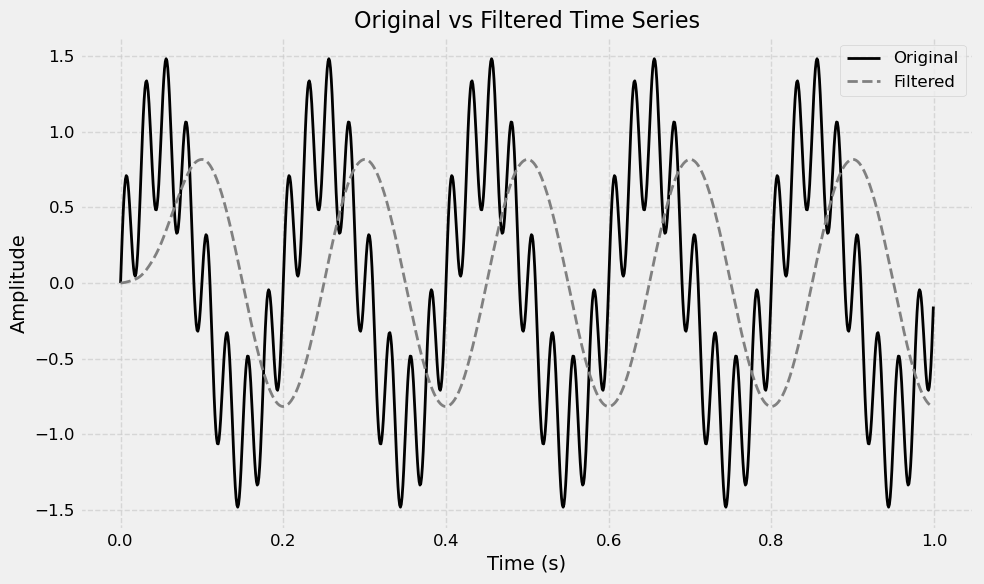

In [7]:
if __name__ == "__main__":
    # Filter parameters
    numtaps = 101  # High order filter to emphasize ringing
    cutoff = 0.1  # Normalized frequency (1.0 = Nyquist frequency)
    fs = 1000  # Hz

    # Design filter
    b = design_fir_filter(numtaps, cutoff, fs)

    # Plot filter characteristics
    plot_filter_characteristics(b, fs)

    # Generate step function
    t = np.arange(500) / fs
    step_data = generate_step_function(500, 100)

    # Apply filter
    filtered_step = signal.lfilter(b, [1.0], step_data)

    # Plot results
    plot_results(t, step_data, filtered_step)

    # Generate and filter a signal with mixed frequencies
    t_mix = np.arange(1000) / fs
    mixed_signal = np.sin(2*np.pi*5*t_mix) + 0.5*np.sin(2*np.pi*40*t_mix)
    filtered_mix = signal.lfilter(b, [1.0], mixed_signal)

    # Plot mixed signal results
    plot_results(t_mix, mixed_signal, filtered_mix)

In [ ]:
plt.style.available

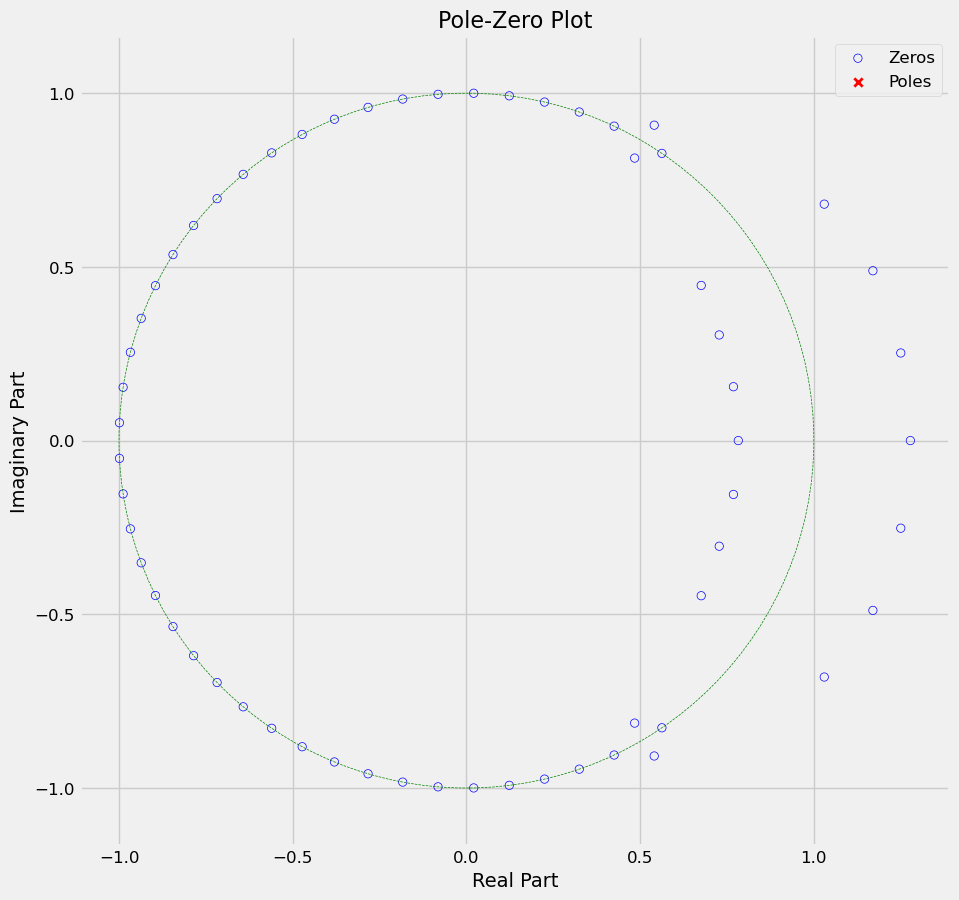

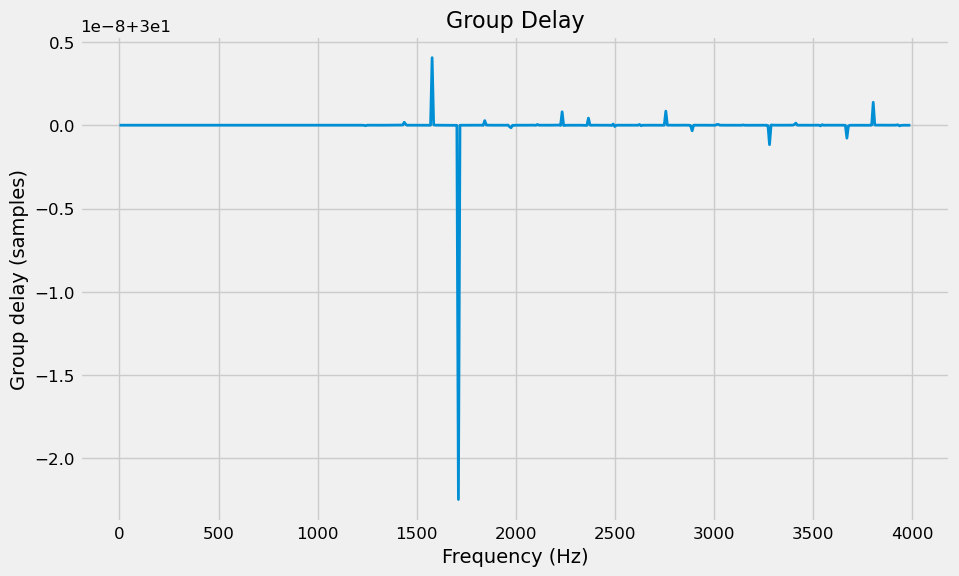

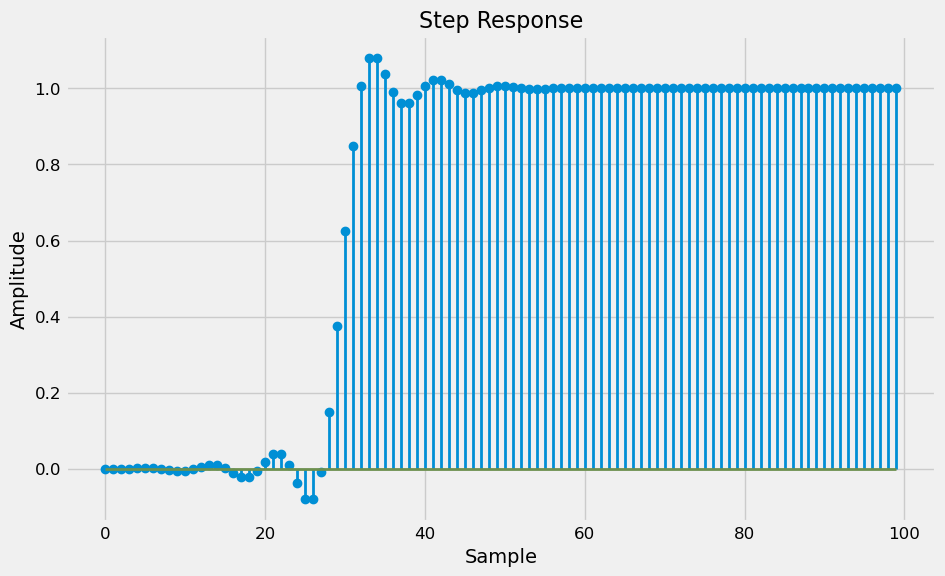

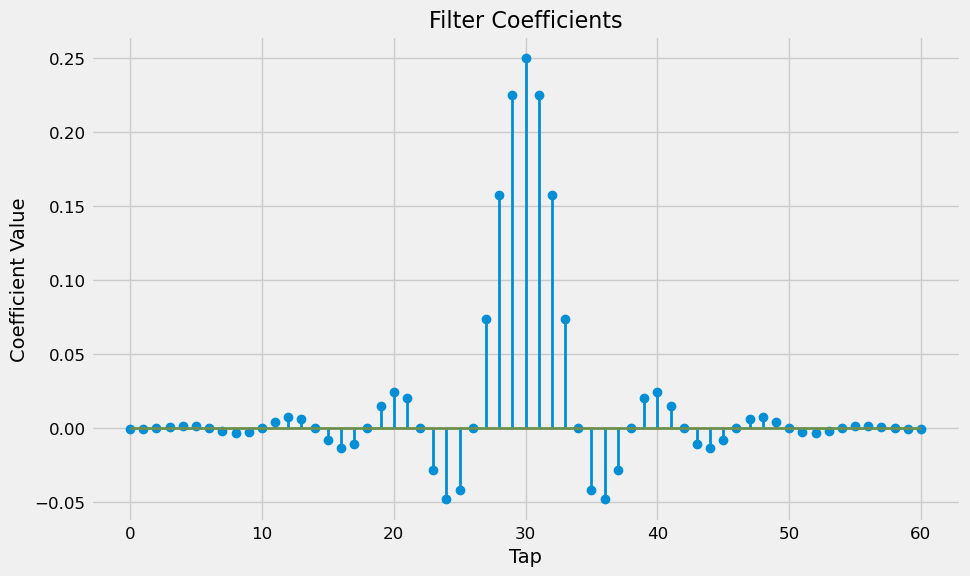

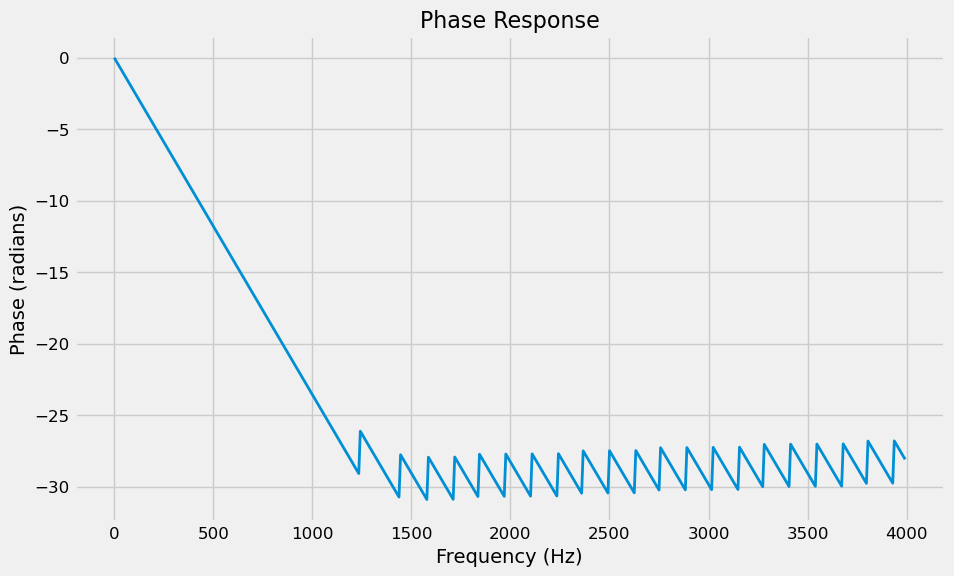

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Define a sample FIR filter
def create_lowpass_fir(numtaps, cutoff, fs):
    return signal.firwin(numtaps, cutoff, fs=fs)

# Parameters
numtaps = 61
cutoff = 1000  # Hz
fs = 8000  # Hz

# Create the FIR filter
fir_coeff = create_lowpass_fir(numtaps, cutoff, fs)

# 1. Pole-Zero Plot
def plot_pole_zero(b):
    z, p, k = signal.tf2zpk(b, 1)
    plt.figure(figsize=(10, 10))
    plt.scatter(np.real(z), np.imag(z), marker='o', edgecolors='b', facecolors='none', label='Zeros')
    plt.scatter(np.real(p), np.imag(p), marker='x', color='r', label='Poles')
    circle = plt.Circle((0, 0), 1, fill=False, color='g', linestyle='--')
    plt.gca().add_artist(circle)
    plt.axis('equal')
    plt.title('Pole-Zero Plot')
    plt.xlabel('Real Part')
    plt.ylabel('Imaginary Part')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_pole_zero(fir_coeff)

# 2. Group Delay
def plot_group_delay(b, fs):
    w, gd = signal.group_delay((b, 1))
    plt.figure(figsize=(10, 6))
    plt.plot(w * fs / (2 * np.pi), gd)
    plt.title('Group Delay')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Group delay (samples)')
    plt.grid(True)
    plt.show()

plot_group_delay(fir_coeff, fs)

# 3. Step Response
def plot_step_response(b):
    n = 100
    step = np.ones(n)
    step_response = signal.lfilter(b, 1, step)
    plt.figure(figsize=(10, 6))
    plt.stem(np.arange(n), step_response)
    plt.title('Step Response')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()

plot_step_response(fir_coeff)

# 4. Filter Coefficient Visualization
def plot_filter_coefficients(b):
    plt.figure(figsize=(10, 6))
    plt.stem(np.arange(len(b)), b)
    plt.title('Filter Coefficients')
    plt.xlabel('Tap')
    plt.ylabel('Coefficient Value')
    plt.grid(True)
    plt.show()

plot_filter_coefficients(fir_coeff)

# 5. Phase Response
def plot_phase_response(b, fs):
    w, h = signal.freqz(b)
    plt.figure(figsize=(10, 6))
    plt.plot(w * fs / (2 * np.pi), np.unwrap(np.angle(h)))
    plt.title('Phase Response')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Phase (radians)')
    plt.grid(True)
    plt.show()

plot_phase_response(fir_coeff, fs)